# 20MAI0038

# Rahul Laxman Vasanad

In [1]:
# importing necessary libraries
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing dataset and I took dataset from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/parkinsons)
dataset =pd.read_csv(r"C:\Users\DELL\Downloads\parkinsons.csv")

In [3]:
#No of records in dataset
dataset.shape

(195, 24)

In [4]:
#First 5 samples of dataset
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
#data types of attributes in Data set
dataset.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

1 in x axis represent Number of people affected by parkinsons disease
0 in x axis represent Number of people not affected by parkinsons disease


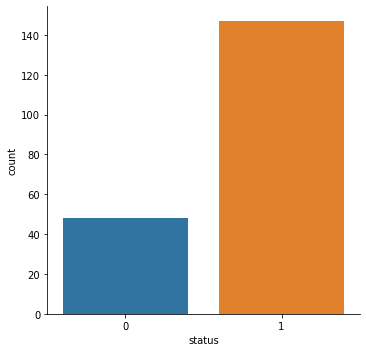

In [6]:
# Counting the target values 
import seaborn as sns
sns.catplot(x='status',kind='count',data=dataset)
print("1 in x axis represent Number of people affected by parkinsons disease")
print("0 in x axis represent Number of people not affected by parkinsons disease")

In [7]:
# Set the Predictor(X) and Response(y) variables
X=dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,12,14,15,16,18,19,20,21,22,23]].values
y=dataset.iloc[:,17].values

In [9]:
# Spliting into Training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.3, random_state = 25)

In [10]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [11]:
# Feature Extraction by applying Principal Component Analysis(PCA) to select that features with highest variance 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
variance = pca.explained_variance_ratio_

In [18]:
#Fitting onto Stochastic Gradient Descent(SGD) classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train,Y_train)
SGDClassifier(max_iter=5)
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [19]:
#Confusion Matrix and Accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import average_precision_score,f1_score
cm=confusion_matrix(Y_test,y_pred)
print(cm)

average_precision = average_precision_score(Y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('Accuracy score')
accuracy_score(Y_test,y_pred)*100

[[ 8  7]
 [ 5 39]]
Average precision-recall score: 0.84
Accuracy score


79.66101694915254

In [20]:
# Classification report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.53      0.57        15
           1       0.85      0.89      0.87        44

    accuracy                           0.80        59
   macro avg       0.73      0.71      0.72        59
weighted avg       0.79      0.80      0.79        59

